In [1]:
import math

import matplotlib.pyplot as plt

# Since the solution has such a stupid name, we need a hack to import it
solution = __import__('04_cubic_ufo_without_scipy')
rotate_points = solution.rotate_points
project_points = solution.project_points
hull_area = solution.hull_area_without_scipy


In [10]:
corners = [
    [-.5, +.5, -.5],
    [+.5, +.5, -.5],
    [+.5, -.5, -.5],
    [+.5, -.5, +.5],
    [-.5, -.5, +.5],
    [-.5, +.5, +.5],
    [-.5, -.5, -.5],
    [+.5, +.5, +.5],
]

In [3]:
pitch = 45/180*math.pi
area = hull_area(project_points(rotate_points(corners, 0, pitch, 0)))
area

0.9999999999999998

# We first y-rotate 45 degrees and then try increasing the x-rotation

## If we order the corners cleverly, the first 6 corners form a hexagon
Ordering them like this simplfies the calculation of the area, since the polygon is "simple".

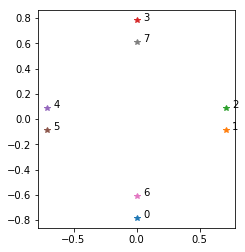

In [4]:
points = project_points(rotate_points(corners, 10/180*math.pi, 45/180*math.pi, 0))
for i, point in enumerate(points):
    plt.plot(point[0], point[1], '*-')
    plt.text(point[0] + .05, point[1] , str(i))
plt.gca().set_aspect('equal')

# An x-rotation between 0 and 90 covers all possible values for the area

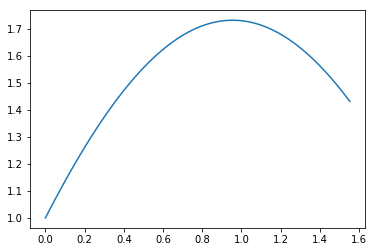

In [7]:
pitch = 45/180*math.pi
yaw = 0
roll_angles = [a/180*math.pi for a in range(90)]
areas = []
for roll in roll_angles:
    points = project_points(rotate_points(corners, roll, pitch, yaw))
    selected_points = points[:6]
    areas.append(hull_area(selected_points))
plt.plot(roll_angles, areas)

## Max area is at the tetraedon angle $\arctan({\sqrt{2}})$

In [9]:
roll_angle = math.atan(math.sqrt(2))
hull_area(project_points(rotate_points(corners, roll_angle, 45/180*math.pi, 0))[:6])

1.732050807568877

# So, in order to find a specified area, we can search for roll_angles between 0 and  $\arctan({\sqrt{2}})$